In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [5]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('SalesAll2019.csv', parse_dates=['Order Date'], dayfirst=True)
# Loại bỏ các cột không cần thiết
columns_to_drop = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Purchase Address','City']
data.drop(columns=columns_to_drop, inplace=True)
# Chuyển đổi cột 'Order Date' thành kiểu datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Tính tổng tiền bán của mỗi ngày
daily_sales = data.groupby(data['Order Date'].dt.date)['Total Price'].sum().reset_index()

# Đổi tên cột 'Order Date' thành 'date' 
daily_sales.rename(columns={'Order Date': 'date'}, inplace=True)
# Sắp xếp lại dữ liệu theo 'Order Date'
daily_sales.sort_values(by='date', inplace=True)
daily_sales['date']=pd.to_datetime(daily_sales['date'])
daily_sales.drop(daily_sales.tail(1).index, inplace=True)
df=daily_sales
print(df)

          date  Total Price
0   2019-01-01     65681.94
1   2019-01-02     70813.20
2   2019-01-03     47046.20
3   2019-01-04     62012.21
4   2019-01-05     46524.63
..         ...          ...
360 2019-12-27    126628.05
361 2019-12-28    134015.50
362 2019-12-29    156024.62
363 2019-12-30    152319.81
364 2019-12-31    131454.30

[365 rows x 2 columns]


Root Mean Squared Error (RMSE): 22289.711025708137
R-squared (R2): 0.3691997667019642
[117077.73404107 117204.5848424  117331.43564372 117458.28644505
 117585.13724638 117711.98804771 117838.83884904 117965.68965037
 118092.5404517  118219.39125303 118346.24205436 118473.09285569
 118599.94365702 118726.79445834 118853.64525967 118980.496061
 119107.34686233 119234.19766366 119361.04846499 119487.89926632
 119614.75006765 119741.60086898 119868.45167031 119995.30247164
 120122.15327296 120249.00407429 120375.85487562 120502.70567695
 120629.55647828 120756.40727961]


d:\project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


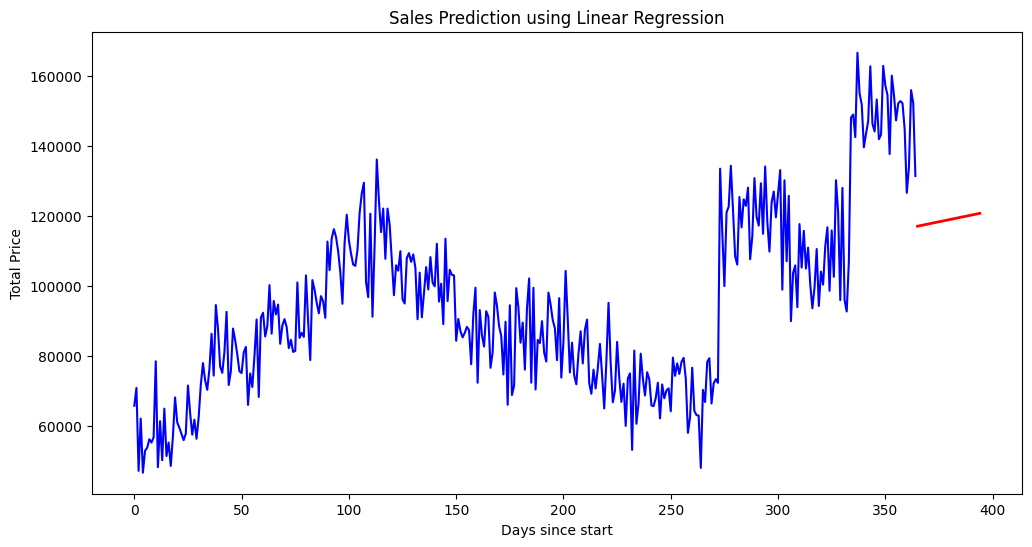

In [6]:
# Chuẩn bị dữ liệu
# Chuyển đổi cột 'date' thành số ngày từ một điểm thời gian tham chiếu (ví dụ: từ ngày đầu năm 2019)
df['date'] = pd.to_datetime(df['date'])
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# Chia dữ liệu thành features (X) và target (y)
X = df[['days_since_start']]
y = df['Total Price']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Khởi tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Dự báo doanh số cho 30 ngày tiếp theo 
future_days = np.arange(df['days_since_start'].max() + 1, df['days_since_start'].max() + 31).reshape(-1, 1)
future_sales = model.predict(future_days)
print(future_sales)
# Vẽ biểu đồ dữ liệu thực tế và dự báo
plt.figure(figsize=(12, 6))
plt.plot(df['days_since_start'], df['Total Price'], color='blue', label='Actual data')
plt.plot(future_days, future_sales, color='red', linewidth=2, label='Predicted trend')
plt.xlabel('Days since start')
plt.ylabel('Total Price')
plt.title('Sales Prediction using Linear Regression')
plt.show()